<a href="https://colab.research.google.com/github/UditGupta10/AKBC-2017-Paper-14/blob/master/Dist_Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import sys
import matplotlib.pyplot as plt
#np.random.seed(42)

In [0]:
size=2**26
np.random.seed(0)
grad_org1 = np.random.uniform(-2,3,size=size)
np.random.seed(42)
grad_org2 = np.random.uniform(-2,3,size=size)

# np.random.seed(0)
# grad_org1 = np.random.choice(np.asarray([-1,0,1]), size=size, p=[0.1, 0.7, 0.2])
# np.random.seed(42)
# grad_org2 = np.random.choice(np.asarray([-1,0,1]), size=size, p=[0.1, 0.7, 0.2])

# grad_org1 = np.asarray(z1)
# grad_org2 = np.asarray(z2)

eta = 0.001
beta1=0.9
beta2=0.999
epsilon = 10**(-1)
procs = 64
mb_small = 2**10
mb_large = mb_small * procs

grad = np.zeros(size//mb_small + 1)
m = np.zeros(size//mb_small + 1)
v = np.zeros(size//mb_small + 1)
alpha = np.zeros(size//mb_small + 1)
val = np.zeros(size//mb_small + 1)

grad_hat = np.zeros(size//mb_large + 1)
m_hat = np.zeros(size//mb_large + 1)
v_hat = np.zeros(size//mb_large + 1)
alpha_hat = np.zeros(size//mb_large + 1)
val_hat = np.zeros(size//mb_large + 1)

m_new = np.zeros(size//mb_large + 1)
v_new = np.zeros(size//mb_large + 1)
alpha_new = np.zeros(size//mb_large + 1)
val_new = np.zeros(size//mb_large + 1)

for t in range(1, size//mb_small + 1):
  temp_g = np.mean(grad_org1[mb_small*(t-1): mb_small*(t-1) + mb_small])
  grad[t] = temp_g
  m[t] = beta1*m[t-1] + (1-beta1)*temp_g
  v[t] = beta2*v[t-1] + (1-beta2)*temp_g**2
#   m_temp = m[t]/(1-beta1**t)
#   v_temp = v[t]/(1-beta2**t)
  alpha[t] = eta*(np.sqrt(1-beta2**t)/(1-beta1**t))
  val[t] = (alpha[t]*m[t])/(np.sqrt(v[t]) + epsilon)
#   val[t] = m_temp/(np.sqrt(v_temp) + epsilon)

grad = grad[1:].reshape((-1, procs))
m = m[1:].reshape((-1, procs))
v = v[1:].reshape((-1, procs))
alpha = alpha[1:].reshape((-1, procs))
val = val[1:].reshape((-1, procs))

beta1_hat = beta1**procs
beta2_hat = beta2**procs
for t in range(1, size//mb_large + 1):
  temp_g = np.mean(grad_org2[mb_large*(t-1): mb_large*(t-1) + mb_large])
  grad_hat[t] = temp_g
  m_hat[t] = (beta1_hat)*m_hat[t-1] + (1-beta1_hat)*temp_g
  v_hat[t] = (beta2_hat)*v_hat[t-1] + (1-beta2_hat)*(temp_g**2)
#   m_temp = m_hat[t]/(1-beta1**t)
#   v_temp = v_hat[t]/(1-beta2**t)
  alpha_hat[t] = eta*(np.sqrt(1-beta2**t)/(1-beta1**t))
  val_hat[t] = (alpha_hat[t]*m_hat[t])/(np.sqrt(v_hat[t]) + epsilon)
#   val_hat[t] = m_temp/(np.sqrt(v_temp) + epsilon)


for i in range(1, size//mb_large + 1):
  agg = 0
  for j in range(procs):
    agg += (beta1**(procs-j-1) * np.mean(grad_org2[(i-1)*mb_large + j*mb_small : (i-1)*mb_large + (j+1)*mb_small]))
  m_new[i] = (beta1**procs)*m_new[i-1] + (1-beta1)*agg 
#m_new[30:] = m_hat[30:]
for i in range(1, size//mb_large + 1):
  agg = 0
  for j in range(procs):
    agg += (beta2**(procs-j-1) * (np.mean(grad_org2[(i-1)*mb_large + j*mb_small : (i-1)*mb_large + (j+1)*mb_small]))**2)
  v_new[i] = (beta2**procs)*v_new[i-1] + (1-beta2)*agg
for t in range(1, size//mb_large + 1):
  alpha_new[t] = eta*(np.sqrt(1-beta2**t)/(1-beta1**t))
  val_new[t] = (alpha_new[t]*m_new[t])/(np.sqrt(v_new[t]) + epsilon)

grad_hat = grad_hat[1:].reshape((-1, 1))
m_hat = m_hat[1:].reshape((-1, 1))
v_hat = v_hat[1:].reshape((-1, 1))
alpha_hat = alpha_hat[1:].reshape((-1, 1))
val_hat = val_hat[1:].reshape((-1, 1))

m_new = m_new[1:].reshape((-1, 1))
v_new = v_new[1:].reshape((-1, 1))
alpha_new = alpha_new[1:].reshape((-1, 1))
val_new = val_new[1:].reshape((-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


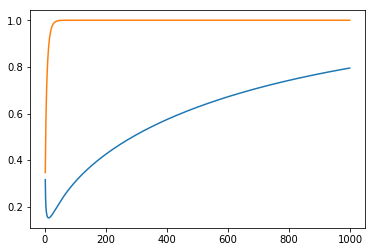

In [9]:
li = []
li2 = []
for i in range(1000):
  li.append(np.sqrt(1-beta2**i)/(1-beta1**i))
  li2.append(np.sqrt(1-beta2_hat**i)/(1-beta1_hat**i))
plt.figure()
plt.plot(li)
plt.plot(li2)

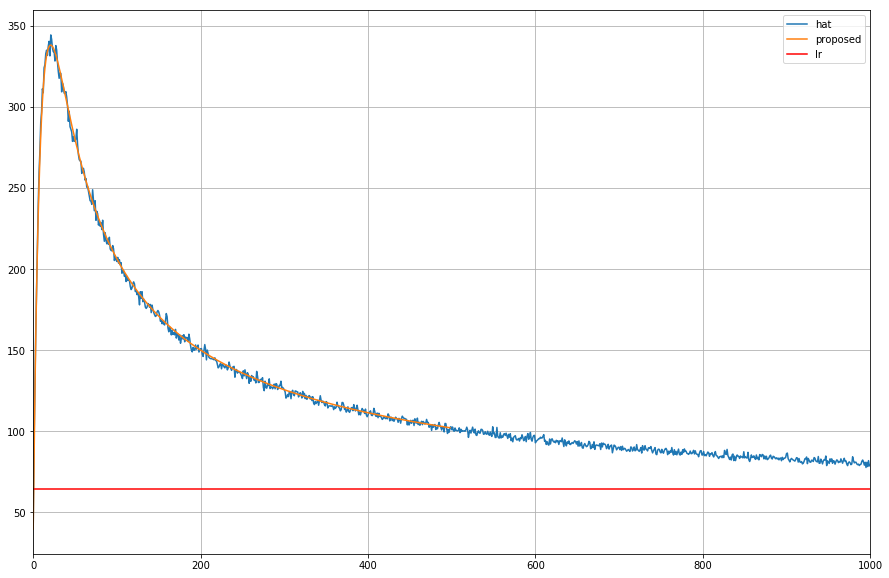

In [25]:
scale = []
for t in range(1,500):
  agg = [(np.sqrt(1-beta2**i)/(1-beta1**i)) for i in range(procs*t, procs*(t-1), -1)]
  np_agg = np.asarray(agg)
  one_shot = (np.sqrt(1-beta2**t)/(1-beta1**t))
  scale.append((np.sum(np_agg))/one_shot)
  #scale.append(np.log(np.sum(np.exp(np_agg)))/one_shot)
scale = np.asarray(scale)
# print('{}, {}, {}'.format(size, np.max(scale), np.argmax(scale)))
# plt.plot(scale)
fig, ax1 = plt.subplots(1,1, figsize=(15,10))
ax1.plot((np.sum(val, axis=1).reshape((-1,1))/val_hat), label='hat')
#ax1.plot((np.sum(val, axis=1).reshape((-1,1))/val_new), label='new')
ax1.plot(scale, label='proposed')
ax1.axhline(y=procs, xmax=size//mb_large, label='lr', color='r')
ax1.set_xlim(0, 1000)
#ax1.set_ylim(0, 20)
ax1.legend()
ax1.grid()

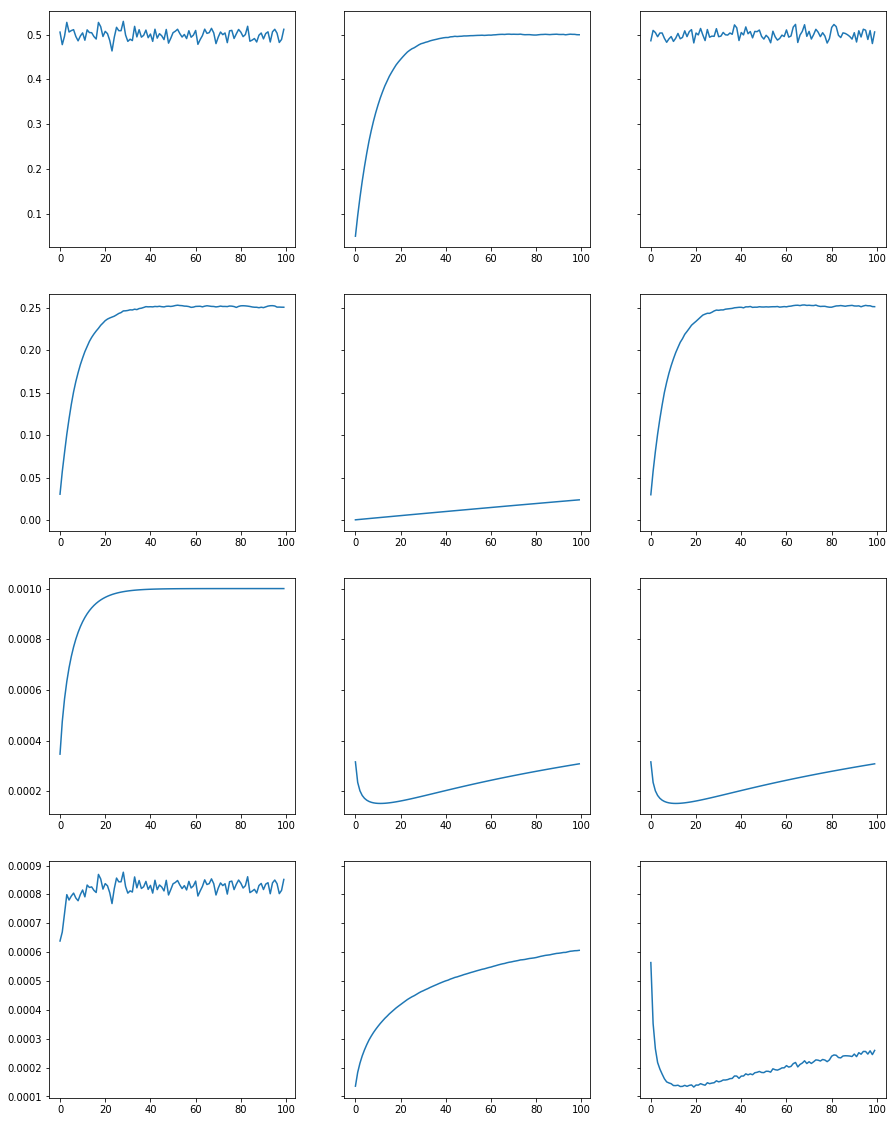

In [0]:
fig, ax = plt.subplots(4,3, figsize=(15,20), sharex=False, sharey='row')
temp = 100
ax[0, 0].plot(m[:temp, procs-1])
ax[0, 1].plot(m_hat[:temp, 0])
ax[0, 2].plot(m_new[:temp, 0])

ax[1, 0].plot(v[:temp, procs-1])
ax[1, 1].plot(v_hat[:temp, 0])
ax[1, 2].plot(v_new[:temp, 0])

#Do not show in final
ax[2, 0].plot(alpha[:temp, procs-1])
ax[2, 1].plot(alpha_hat[:temp, 0])
ax[2, 2].plot(alpha_new[:temp, 0])

ax[3, 0].plot(val[:temp, procs-1])
ax[3, 1].plot(val_hat[:temp, 0])
ax[3, 2].plot(val_new[:temp, 0])

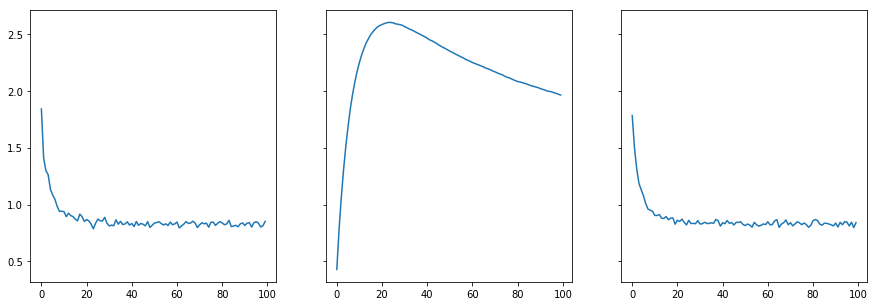

In [0]:
intermediate = m/(np.sqrt(v) + epsilon)
intermediate_hat = m_hat/(np.sqrt(v_hat) + epsilon)
intermediate_new = m_new/(np.sqrt(v_new) + epsilon)

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5), sharex=False, sharey=True)
temp=100
ax1.plot(intermediate[:temp, procs-1])
ax2.plot(intermediate_hat[:temp, 0])
ax3.plot(intermediate_new[:temp, 0])

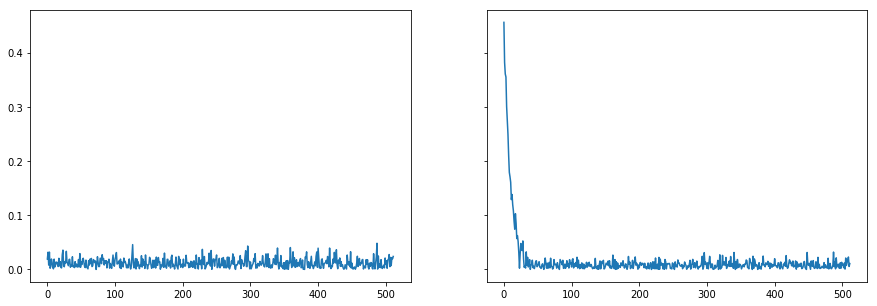

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5), sharex=False, sharey=True)
temp = 1000
ax1.plot(np.abs(m[:temp, procs-1] - m_new[:temp, 0]))
ax2.plot(np.abs(m[:temp, procs-1] - m_hat[:temp, 0]))

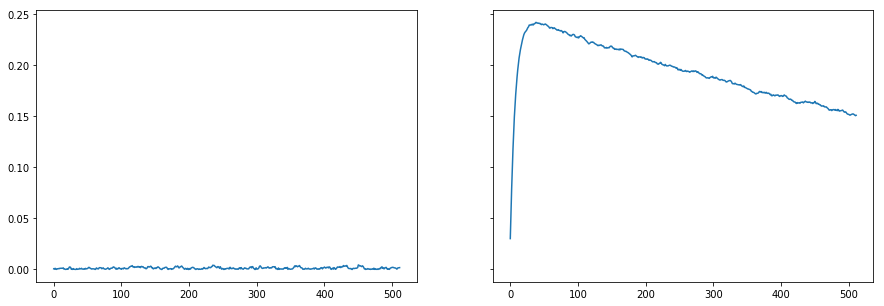

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5), sharex=False, sharey=True)
temp = 1000
ax1.plot(np.abs(v[:temp, procs-1] - v_new[:temp, 0]))
ax2.plot(np.abs(v[:temp, procs-1] - v_hat[:temp, 0]))

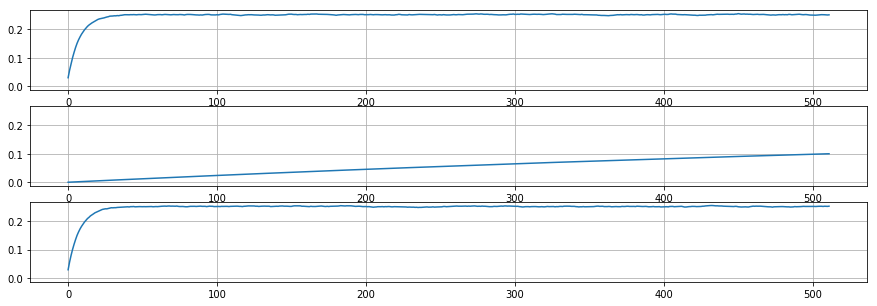

In [0]:
fig, (ax1,ax2, ax3) = plt.subplots(3,1, figsize=(15,5), sharex=False, sharey=True)
temp = 2000
ax1.plot(v[:temp, procs-1])
ax2.plot(v_hat[:temp, 0])
ax3.plot(v_new[:temp, 0])

ax1.grid()
ax2.grid()
ax3.grid()

In [0]:
v[:temp, 0]/v_hat[:temp, 0]

(-200, 200)

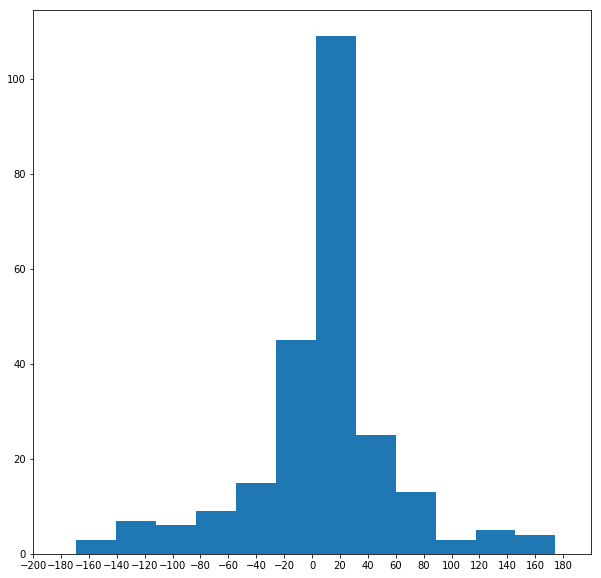

In [0]:
fig, ax1 = plt.subplots(1,1, figsize=(10,10))
ax1.hist((np.sum(val, axis=1).reshape((-1,1))/val_hat), bins=100)
ax1.set_xticks(np.arange(-200, 200, step=20));
ax1.set_xlim(-200,200)

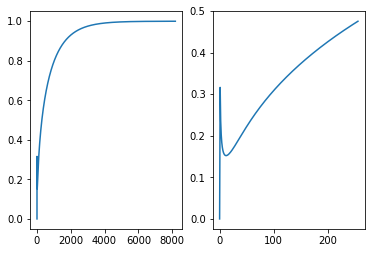

In [0]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(alpha)
ax2.plot(alpha_hat)

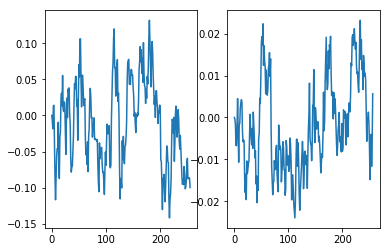

In [0]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(m[:256])
ax2.plot(m_hat)

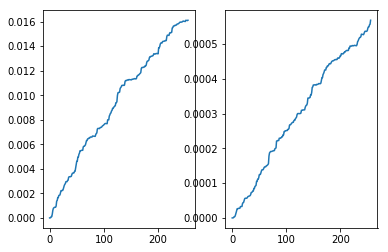

In [0]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(v[:256])
ax2.plot(v_hat)

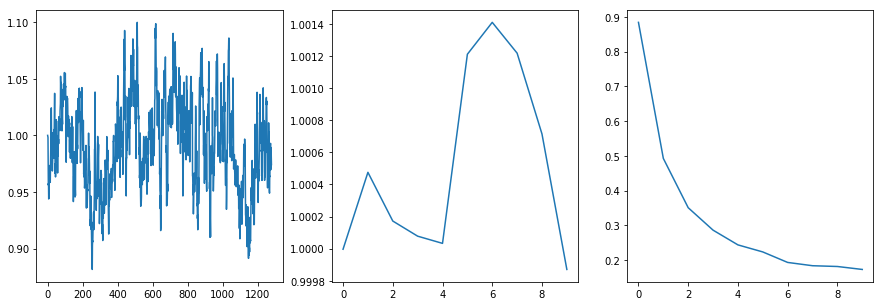

In [0]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
temp = procs*10
ax1.plot(np.ravel(val)[:temp])
ax2.plot(val_hat[:temp//procs, 0])
ax3.plot(val_new[:temp//procs, 0])

In [0]:
m

array([[-0.00637258, -0.01847252,  0.01320926, ...,  0.036618  ,
         0.03198783,  0.03820047],
       [ 0.00318428, -0.01147766, -0.05893201, ..., -0.03201715,
        -0.05451236, -0.04657287],
       [-0.06769748, -0.03659925, -0.07781018, ..., -0.07856343,
        -0.07851981, -0.09119176],
       ...,
       [ 0.01836731,  0.02410577, -0.04427686, ..., -0.13788912,
        -0.15205249, -0.11750735],
       [-0.09245095, -0.10497533, -0.10540511, ...,  0.00510584,
         0.00672298,  0.00996123],
       [ 0.07972371,  0.02894697,  0.03865806, ...,  0.12731082,
         0.06101642,  0.03281976]])